In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Данные константы
k = 0.011  # (Вт/см/K)
c = 1.6  # (Дж/см3/K)
alpha = 0.005  # (Вт/см2/K)
l = 0.5  # длина цилиндра (см)
radius = 4  # радиус (см)
beta = 0.008  # (1/см)
t = 180  # время наблюдения (c)
u0 = 0  # температура окружающей среды (K)

In [3]:
# Задаем число отсчетов и шаги
num_m = 100
num_i = 100
tau = t/num_m # шаг по времени
r_arr = np.linspace(0,radius,num_i) # массив точек распредленных [0,R]
t_arr = np.linspace(0,t, num_m)
h = radius/num_i # шаг по координате r
w = np.zeros((num_i, num_m))

In [4]:
import scipy.optimize
def bessel(x):
    return scipy.special.jv(1,x)
res = scipy.optimize.root(bessel, 3.8) # нахождение нуля функции в окрестности точки x = 3.8
mu1 = float(res.get('x'))  # первый нуль функции бесселя первого порядка

In [5]:
mu1

3.831705970207512

In [6]:
def intensive(i): # интенсивность в i-ой точке
    #assert i<num_i, "функция intensive(r) определена только для r<radius"
    return scipy.special.jv(0, mu1*i*h/radius)

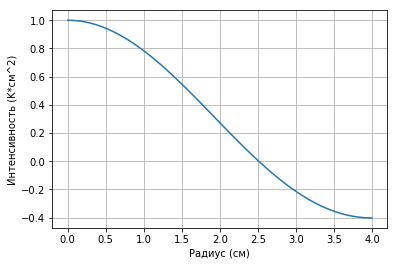

In [7]:
plt.plot(r_arr,scipy.special.jv(0, mu1*r_arr/radius)) #нарисуем интенсивность
plt.ylabel('Интенсивность (K*см^2)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

In [8]:
a_p = c/tau+2*k/h**2+alpha/l
b_p = -2*k/h**2
def c_p(i):
    return -k/(2*h**2) + k/(4*h*i*h)
d_p = c/tau + k/h**2 + alpha/l
def e_p(i):
    return -k/h**2 - k/(4*h*i*h)
f_p = -k/h**2
g_p = c/tau + k/h**2 + alpha/l
# def q_p(i):
#     return beta/l*intensive(i)

In [9]:
a_q = c/tau - 2*k/h**2 - alpha/l
b_q = 2*k/h**2
def c_q(i):
    return k/(2*h**2) - k/(4*h*i*h)
d_q = c/tau - k/h**2 - alpha/l
def e_q(i):
    return k/(2*h**2) + k/(4*h*i*h)
f_q = k/h**2
g_q = c/tau - k/h**2 - alpha/l

In [10]:
P = np.zeros((num_i, num_i))
P[0,0] = a_p
P[0,1] = b_p
for i in range(1,num_i-1):  # по всем индексам кроме нулевого и последнего
    P[i,i-1] = c_p(i)
    P[i,i] = d_p
    P[i,i+1] = e_p(i)
P[-1,-2] = f_p
P[-1,-1] = g_p

In [11]:
P

array([[ 14.64888889, -13.75      ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.71875   ,   7.77388889,  -8.59375   , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  -2.578125  ,   7.77388889, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   7.77388889,
         -6.89271907,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,  -3.41996173,
          7.77388889,  -6.89253827],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         -6.875     ,   7.77388889]])

In [12]:
Q = np.zeros((num_i, num_i))
Q[0,0] = a_q
Q[0,1] = b_q
for i in range(1,num_i-1):  # по всем индексам кроме нулевого и последнего
    Q[i,i-1] = c_q(i)
    Q[i,i] = d_q
    Q[i,i+1] = e_q(i)
Q[-1,-2] = f_q
Q[-1,-1] = g_q

In [13]:
Q

array([[-12.87111111,  13.75      ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  1.71875   ,  -5.99611111,   5.15625   , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   2.578125  ,  -5.99611111, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  -5.99611111,
          3.45521907,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   3.41996173,
         -5.99611111,   3.45503827],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          6.875     ,  -5.99611111]])

In [14]:
# краевое условие
w[:,0] = 0 # при t = 0

In [15]:
q = np.zeros((1,num_i))
for i in range(num_i):
    q[0,i] = beta/l*intensive(i)
q = q.reshape(num_i,-1)
q.shape

(100, 1)

In [16]:
for m in range(0,num_m-1): # идем послойно, по времени
    right_column = Q@(w[:,m].reshape(num_i,-1))+q
    w[:,m+1] = np.linalg.solve(P,right_column)[:,0]
    

In [17]:
v = w + u0

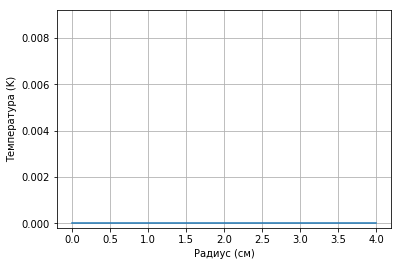

In [18]:
plt.plot(r_arr,v[:,0]) # распредление по радиусу в начальный момент времени
plt.ylim((-0.0002, 0.0092))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

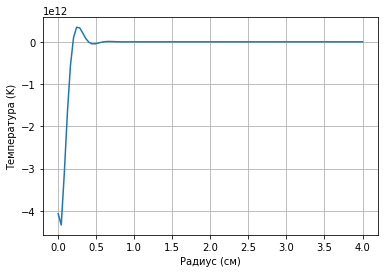

In [19]:
plt.plot(r_arr,v[:,1]) # распредление по радиусу во время второго отсчета по времени
#plt.ylim((-0.0002, 0.0084))
plt.ylabel('Температура (K)')
plt.xlabel('Радиус (см)')
plt.grid(True) 
plt.show()

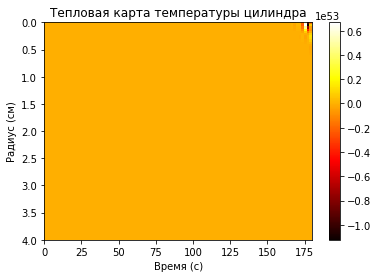

In [20]:
import matplotlib.cm as cmap
extent = [np.min(t_arr), np.max(t_arr), np.max(r_arr), np.min(r_arr)]
plt.imshow(v, cmap=cmap.hot, aspect='auto', extent=extent)
plt.title("Тепловая карта температуры цилиндра")
plt.ylabel('Радиус (см)')
plt.xlabel('Время (с)')
plt.colorbar()
plt.show()